In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as  pd
import seaborn as sns
plt.rcParams["font.family"] = "Avenir"
import seaborn as sns
sns.set_context("paper",font_scale=1.9,rc={"lines.linewidth": 0.5})
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from astroquery.vizier import Vizier
vsearch = Vizier(columns=["+_r","**"])
Vizier.ROW_LIMIT=-1
Vizier.TIMEOUT = 300
import astropy.units as u
pd.options.display.max_columns = 100
pd.options.display.max_rows = 100

In [2]:
uma_df = pd.read_csv('/Users/melindasoares/Dropbox/Research_TIC130181866_Jankowski_Capistrant/Notebooks/UMa_Sources.csv', index_col=0)
uma_df[uma_df['TIC ID']==362747897]
uma_df['BP-RP (corrected)'][83]=0.7367
uma_df['RUWE'][83]=2.1055

In [3]:
uma_df.drop('vsini (km/s)', axis=1, inplace=True)

A(Li) Ramirez+2012	Mishenina+, 2008	Aguilera-Gomez+2018	Llorente de Andres+, 2021	Gonzalez+2010	King & Schuler 2005	Ammler-von Eiff & Guenther 2009	Soderblom et al. 1993	Lubin et al. 2010

In [4]:
abundances, uncertainties = [], []
colors = []

ruwes=[]
for i, row in uma_df.iterrows():
    if '+/-' in str(row['A(Li) Ramirez+2012']) or '+/-' in str(row['Aguilera-Gomez+2018']) or\
    '+/-' in str(row['Mishenina+, 2008']) or '+/-' in str(row['Soderblom et al. 1993']) or\
    '+/-' in str(row['Llorente de Andres+, 2021']) or '+/-' in str(row['Gonzalez+2010']) or\
    '+/-' in str(row['King & Schuler 2005']) or '+/-' in str(row['Ammler-von Eiff & Guenther 2009']):
        colors.append(float(row['BP-RP (corrected)']))
        ruwes.append(float(row['RUWE']))
        num, dem, k = 0, 0, 0
        for j in row:
            if '+/-' in str(j):
                ab, un = float(j.split('+/-')[0]), float(j.split('+/-')[1])
                num += (ab*(1./un))
                dem += (1./un)
                k += 1
        weight_av = num/dem
        uncert = k*(1/dem)
        abundances.append(weight_av)
        uncertainties.append(uncert)

In [5]:
def plot_colors2(yval,alpha):
    shift=0.0

    bprp1=0.25
    bprp2=0.5
    plt.axvspan(bprp1,bprp2, alpha=alpha, color='#93aaff',zorder=1)#F
    val=bprp1+(bprp2-bprp1)/2-shift
    plt.annotate('A', xy =(val,yval),xytext =(val, yval),fontsize=22)

    bprp1=0.5
    bprp2=0.767
    plt.axvspan(bprp1,bprp2, alpha=alpha, color='#dddeff',zorder=1)#F
    val=bprp1+(bprp2-bprp1)/2-shift
    plt.annotate('F', xy =(val,yval),xytext =(val, yval),fontsize=22)

    bprp1=0.768
    bprp2=0.984
    plt.axvspan(bprp1,bprp2, alpha=alpha, color='#ffebdf',zorder=1)#G
    val=bprp1+(bprp2-bprp1)/2-shift
    plt.annotate('G', xy =(val,yval),xytext =(val, yval),fontsize=22,zorder=10)

    bprp1=0.983
    bprp2=1.2
    plt.axvspan(bprp1,bprp2, alpha=alpha, color='#ffb177',zorder=1)#K
    val=bprp1+(bprp2-bprp1)/2-shift
    plt.annotate('K', xy =(val,yval),xytext =(val, yval),fontsize=22,zorder=10)
    
    bprp1=1.2
    bprp2=1.6
    plt.axvspan(bprp1,bprp2, alpha=alpha, color='#ffa448',zorder=1)#M
    val=bprp1+(bprp2-bprp1)/2-shift
    plt.annotate('M', xy =(val,yval),xytext =(val, yval),fontsize=22,zorder=10)

In [6]:
abundances[5]=2.5
uncertainties[5]=0.2

In [7]:
from astropy.io import ascii
table_pleiades = ascii.read('https://cdsarc.cds.unistra.fr/ftp/J/A+A/613/A63/tableb1.dat',\
                            readme='https://cdsarc.cds.unistra.fr/ftp/J/A+A/613/A63/ReadMe', format='cds')

table_praesepe = ascii.read('https://cdsarc.cds.unistra.fr/ftp/J/AJ/153/128/table7.dat',\
                          readme='https://cdsarc.cds.unistra.fr/ftp/J/AJ/153/128/ReadMe', \
                          fill_values = [('---', '0', 'e_Teff'), ('---', '0', 'EW(Li)'),\
                                         ('---', '0', 'e_EW(Li)'), ('---', '0', 'e_A(Li)S/N'),\
                                         ('---', '0', 'e_A(Li)Teff'), ('---', '0', 'S/N'), ('---', '0', 'Exp1'), \
                                        ('---', '0', 'vsini'), ('---', '0', 'RV')],\
                          format='cds')
table_hyades = ascii.read('https://cdsarc.cds.unistra.fr/ftp/J/AJ/153/128/table6.dat',\
                          readme='https://cdsarc.cds.unistra.fr/ftp/J/AJ/153/128/ReadMe', \
                          fill_values = [('---', '0', 'e_Teff'), ('---', '0', 'EW(Li)'),\
                                         ('---', '0', 'e_EW(Li)'), ('---', '0', 'e_A(Li)S/N'),\
                                         ('---', '0', 'e_A(Li)Teff'), ('---', '0', 'S/N'), ('---', '0', 'Exp1'), \
                                        ('---', '0', 'vsini'), ('---', '0', 'RV')],\
                          format='cds')


def teff_to_gaia(temp, feh):
    theta = 5040/temp
    p = [-0.0353, 0.5092-0.0395*feh, 0.4929+0.0192*feh-0.002*feh**2-theta]
    bprp = np.roots(p)
    return(bprp)

pleiades_bprp, pleiades_ali = [], []

for ii in range(len(table_pleiades['Teff'])):
    pleiades_bprp.append(min(teff_to_gaia(table_pleiades['Teff'][ii], 0.03)))
    pleiades_ali.append(table_pleiades['ALi'][ii])
    
hyades_bprp, hyades_ali = [], []

for ii in range(len(table_hyades['Teff'])):
    if table_hyades['Group'][ii] == 'A':
        hyades_bprp.append(min(teff_to_gaia(table_hyades['Teff'][ii], 0.14)))
        hyades_ali.append(table_hyades['A(Li)'][ii])
        
praesepe_bprp, praesepe_ali = [], []

for ii in range(len(table_praesepe['Teff'])):
    if table_praesepe['Group'][ii] == 'A':
        praesepe_bprp.append(min(teff_to_gaia(table_praesepe['Teff'][ii], 0.14)))
        praesepe_ali.append(table_praesepe['A(Li)'][ii])

In [8]:
uma_df[uma_df['TIC ID']==24910401]


,TIC ID,GaiaID,RA,DEC,Apparent Gaia Mag,BP-RP (corrected),Gaia DR3 RV,RUWE,Mann+2020 Inclusion?,TIC contamination ratio,exofop rv data?,Unpublished TRES data?,GALAH DR3,LAMOST,CHEOPS,A(Li) Ramirez+2012,"Mishenina+, 2008",Aguilera-Gomez+2018,"Llorente de Andres+, 2021",Gonzalez+2010,King & Schuler 2005,Ammler-von Eiff & Guenther 2009,Soderblom et al. 1993,Lubin et al. 2010,"EW from Optical high-resolution spectroscopy of WTTSs (Xing, 2010)","EW from White+, 2007","EW from Search for Associations Containing Young stars (Torres+, 2006)",Unpublished McDonald Observatory Data?,Prot,Prot_Error,Simbad Link,Comment
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
82,24910401,2461045711199481472,27.347294,-10.703616,6.589531,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,0.9,NaN,NaN


In [9]:
uma_df['ALi']=[np.nan]*len(uma_df)
uma_df['e_ALi']=[np.nan]*len(uma_df)
uma_df['ALi'][21]=1.30
uma_df['e_ALi'][21]=0.2
uma_df['ALi'][80]=-0.27
uma_df['BP-RP (corrected)'][80]=1.444213
uma_df['e_ALi'][80]=0.2
uma_df['ALi'][82]=2.54
uma_df['e_ALi'][82]=0.1
uma_df['BP-RP (corrected)'][82]=0.808414


In [10]:
uma_df[uma_df['TIC ID']==24910401]

,TIC ID,GaiaID,RA,DEC,Apparent Gaia Mag,BP-RP (corrected),Gaia DR3 RV,RUWE,Mann+2020 Inclusion?,TIC contamination ratio,exofop rv data?,Unpublished TRES data?,GALAH DR3,LAMOST,CHEOPS,A(Li) Ramirez+2012,"Mishenina+, 2008",Aguilera-Gomez+2018,"Llorente de Andres+, 2021",Gonzalez+2010,King & Schuler 2005,Ammler-von Eiff & Guenther 2009,Soderblom et al. 1993,Lubin et al. 2010,"EW from Optical high-resolution spectroscopy of WTTSs (Xing, 2010)","EW from White+, 2007","EW from Search for Associations Containing Young stars (Torres+, 2006)",Unpublished McDonald Observatory Data?,Prot,Prot_Error,Simbad Link,Comment,ALi,e_ALi
Index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
82,24910401,2461045711199481472,27.347294,-10.703616,6.589531,0.808414,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.7,0.9,NaN,NaN,2.54,0.1


In [11]:
Vizier.ROW_LIMIT=-1

#J/A+A/541/A150      
#Lithium in M67 and Hyades
#(Pace+, 2012)
cat=Vizier.get_catalogs('J/A+A/541/A150')
cat=cat[1]
dc=pd.DataFrame({'Teff': cat['Teff'], 'ALi':cat['A'],'e_ALi':cat['e_A']})
dc['bp_rp_corr']=[0.0]*len(dc)
for i in dc.index:
    dc.bp_rp_corr[i]=min(teff_to_gaia(dc.Teff[i],0))
dc[:2]

,Teff,ALi,e_ALi,bp_rp_corr
0,5916,2.73,0.03,0.743391
1,5099,1.37,NaN,1.049511


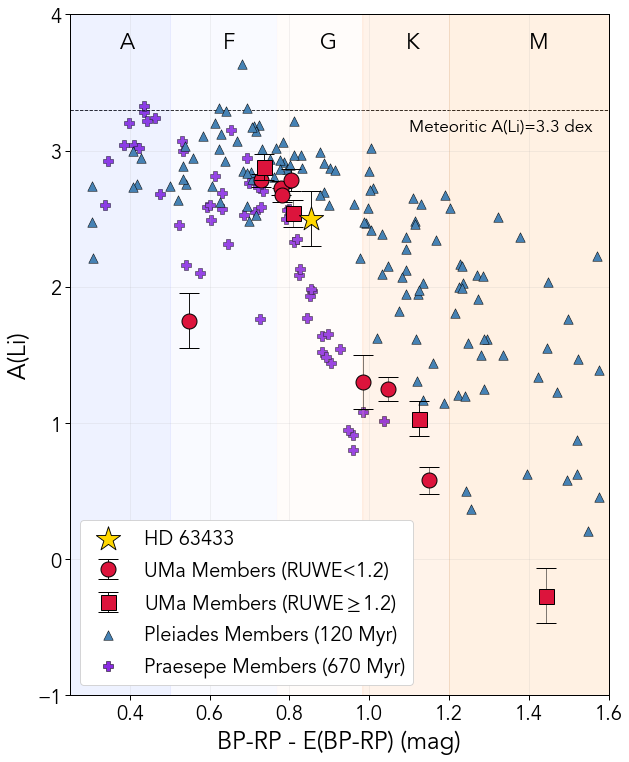

In [12]:
sns.set_context("paper",font_scale=2.0,rc={"lines.linewidth": 0.5})
fig, ax = plt.subplots(figsize=(9,11))

#ax.errorbar(dc.bp_rp_corr,dc.ALi,yerr=dc.e_ALi,fmt='o',markersize=9,marker='^')


ax.errorbar(uma_df['BP-RP (corrected)'][21], uma_df.ALi[21], yerr=uma_df.e_ALi[21], 
            fmt='o', markersize=15,color='crimson',
            markeredgecolor='black',ecolor='black',capsize=10)
ax.errorbar(uma_df['BP-RP (corrected)'][80], uma_df.ALi[80], yerr=uma_df.e_ALi[80], 
            fmt='s', markersize=15,color='crimson',
            markeredgecolor='black',ecolor='black',capsize=10)
ax.errorbar(uma_df['BP-RP (corrected)'][82], uma_df.ALi[82], yerr=uma_df.e_ALi[82], 
            fmt='s', markersize=15,color='crimson',
            markeredgecolor='black',ecolor='black',capsize=10)
ax.errorbar(colors[5], abundances[5], yerr=uncertainties[5], fmt='.',color='crimson',zorder=3,
            markeredgecolor='black',lw=0.9,ecolor='black',capsize=10)
ax.errorbar(colors[7:8], abundances[7:8], yerr=uncertainties[7:8], fmt='o', markersize=15,color='crimson',
            markeredgecolor='black',ecolor='black',capsize=10)
ax.errorbar(colors[9], abundances[9], yerr=uncertainties[9], fmt='o', markersize=15,color='crimson',
            markeredgecolor='black',ecolor='black',capsize=10)
ax.errorbar(colors[10], abundances[10], yerr=uncertainties[9], fmt='s',color='crimson',zorder=3,
            markeredgecolor='black',lw=0.9,ecolor='black',capsize=10,markersize=15)

pop1 = ax.errorbar(colors[0:5], abundances[0:5], yerr=uncertainties[0:5], fmt='o', markersize=15,color='crimson',
            markeredgecolor='black',lw=0.9,label='UMa Members (RUWE$<1.2$)',ecolor='black',
            capsize=10)
pop2 = ax.errorbar(colors[8], abundances[8], yerr=uncertainties[8], fmt='s',color='crimson',zorder=3,
            markeredgecolor='black',lw=0.9,ecolor='black',capsize=10,markersize=15,
            label='UMa Members (RUWE$\geq 1.2$)')

pop3 = ax.scatter(colors[5], abundances[5], marker='*', color='gold', s=650,zorder=14,
           edgecolors='black',lw=0.9,label='HD 63433')

pop4 = ax.scatter(pleiades_bprp, pleiades_ali, marker='^', facecolor='steelblue',edgecolors='black',lw=0.5,
          label='Pleiades Members (120 Myr)',zorder=2,s=90)
pop5 = ax.scatter(praesepe_bprp, praesepe_ali, marker='P', facecolor='blueviolet',lw=0.5,edgecolors='black',
           label='Praesape Members (670 Myr)',s=90)

plt.hlines(3.3,0.25,1.6,linestyle='dashed',lw=0.9,color='black',zorder=1)
xval=1.1
yval=3.15
plt.annotate('Meteoritic A(Li)=3.3 dex', xy=(xval, yval), xytext=(xval, yval),
             color='black',fontsize=17,zorder=1)

plot_colors2(3.75,0.15)

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.xlabel('BP-RP - E(BP-RP) (mag)',fontsize=24)
plt.ylabel('A(Li)', fontsize=24)
plt.xlim(0.25,1.6)
#plt.xlim(0.1,3.35)
plt.tight_layout(pad=1.2)
#plt.legend(loc='',)
plt.legend(handles=[pop3,pop1,pop2,pop4,pop5], labels=['HD 63433',r'UMa Members (RUWE<1.2)',
                                              r'UMa Members (RUWE$\mathcal{\geq}$1.2)','Pleiades Members (120 Myr)',
                                                      'Praesepe Members (670 Myr)'], loc='lower left',
           facecolor='w',framealpha=1,fontsize=20)
plt.ylim(-1.0,4.0)
plt.grid(alpha=0.2)
plt.savefig('/Users/melindasoares/Desktop/colorali.png', facecolor='white', dpi=500)